## Análise das Músicas do Spotify


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
tracks = pd.read_csv('tracks.csv')
tracks

,id,name,duration_ms,artists,explicit,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
0,spotify:track:0hJkacKTAr8GZeKwcPuUk2,Yesterday's Trash,52213,"{""(24OGO7fr96L0azkG3pZZa2,\""Modern Life Is War...",t,0,0.004530,0.324,0.971,0.012800,0,0.3340,-3.168,1,0.0548,95.721,4
1,spotify:track:1xjFMVi8pn5VIWiqrdxAMc,promise [interlude],88888,"{""(5b0XQwyoJBFd3MwL2YxEPO,Nohidea)""}",f,0,0.833000,0.545,0.495,0.629000,11,0.3860,-13.538,1,0.1020,62.631,4
2,spotify:track:2ahiPTFTfIPs7UKqjKhJkc,Requiem - Alex Vidal Remix,564720,"{""(6WrPC9g41hy7LUnpxdy6u7,\""Alex Vidal\"")"",""(2...",f,0,0.033200,0.695,0.592,0.892000,0,0.5790,-9.588,1,0.0345,125.008,4
3,spotify:track:2z5xCMFxAo7dn6zsu6UwL9,Kaké,245356,"{""(44DhAhLWsSFvSqVXDUruVE,\""Young Paris\"")""}",t,0,0.000440,0.450,0.629,0.895000,7,0.1080,-7.059,1,0.1460,193.228,3
4,spotify:track:16axQgz02GFMiU2xKMT4qJ,F the Bull$h1t - Original Mix,315773,"{""(2ohlvFf9PBsDELdRstPtlP,\""Ferry Corsten\"")""}",f,0,0.000927,0.846,0.707,0.903000,6,0.0666,-5.949,0,0.1270,127.970,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261611,spotify:track:6OjPR4Y7VGDBaJMSD3QA0t,Waking Up The Dawn,294333,"{""(7beSXA7nBwZ5xJ8jUa77ZL,\""Michael English\"")""}",f,2,0.109000,0.538,0.609,0.000006,5,0.0948,-7.392,1,0.0275,87.960,4
2261612,spotify:track:1nvTse7nkCr8tO8LOAell4,Here Comes the Star,202733,"{""(48YxSlb23RAaCd4RyHcV9V,\""Herman's Hermits\"")""}",f,0,0.698000,0.339,0.325,0.000005,2,0.5550,-11.445,1,0.0252,91.286,4
2261613,spotify:track:5vKVjyFJNtfdHXzzLaWbpz,You're With Me,293546,"{""(0WTXG5dSB0wpykAqPpEmFl,UnchainD)""}",f,0,0.018600,0.482,0.443,0.000345,4,0.1100,-8.622,1,0.0276,144.962,4
2261614,spotify:track:7LdoOfaFSBX9Cy2R3NGcAx,Reverse Skydiving (feat. Anabel Englund),329065,"{""(4aKZ8rfdsQeR7YSskFu9V3,\""Hot Natured\"")"",""(...",f,46,0.006410,0.915,0.461,0.059500,11,0.0771,-7.965,0,0.0505,118.013,4


In [ ]:
tracks.shape

(2261616, 17)

Distribuição da duração das músicas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


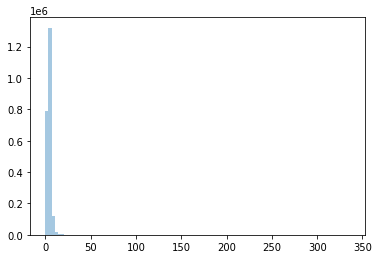

In [ ]:
sns.distplot(x=tracks['duration_ms']/60000, bins=100, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


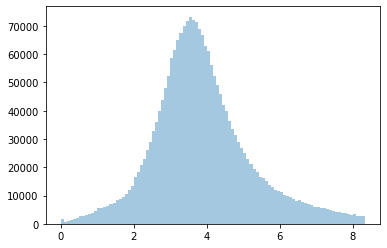

In [ ]:
sns.distplot(x=tracks.query('duration_ms<500000')['duration_ms']/60000, bins=100, kde=False)

Número de músicas explicitas

In [ ]:
tracks['explicit'].value_counts()

f    2070435
t     191181
Name: explicit, dtype: int64

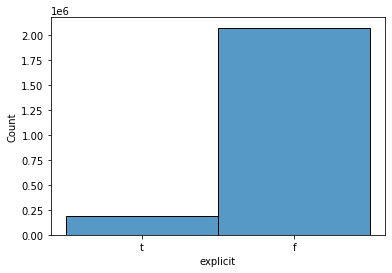

In [ ]:
sns.histplot(tracks['explicit'])

Popularidade

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


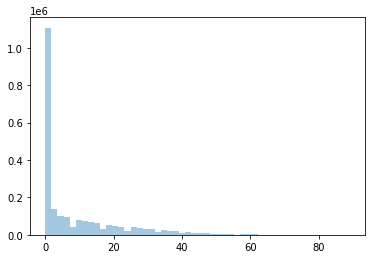

In [ ]:
sns.distplot(x=tracks['popularity'], kde=False)

Acústica

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


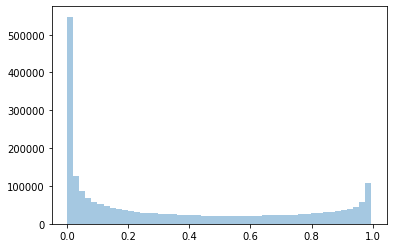

In [ ]:
sns.distplot(x=tracks['acousticness'], kde=False)

Dançabilidade

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


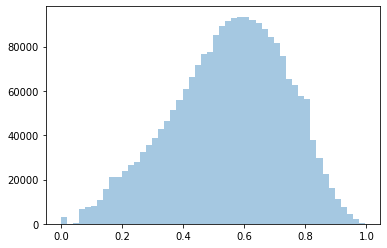

In [ ]:
sns.distplot(x=tracks['danceability'], kde=False)

Energia

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


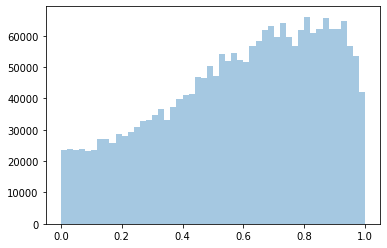

In [ ]:
sns.distplot(x=tracks['energy'], kde=False)

Instrumentabilidade

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


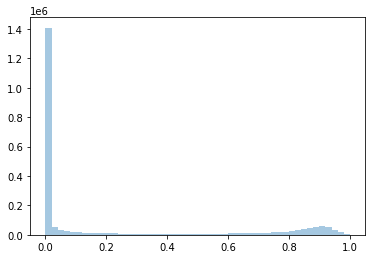

In [ ]:
sns.distplot(x=tracks['instrumentalness'], kde=False)

Tom

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


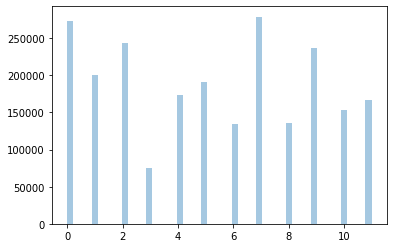

In [ ]:
sns.distplot(x=tracks['key'], kde=False)

Ao Vivo

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


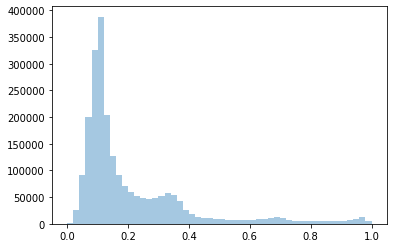

In [ ]:
sns.distplot(x=tracks['liveness'], kde=False)

Barulho

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


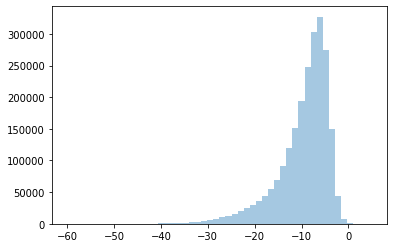

In [ ]:
sns.distplot(x=tracks['loudness'], kde=False)

Modo

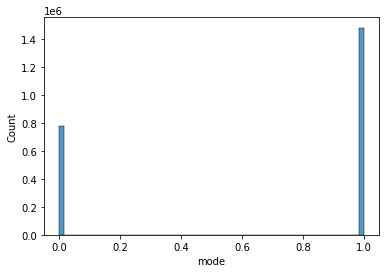

In [ ]:
sns.histplot(tracks['mode'])

Fala

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


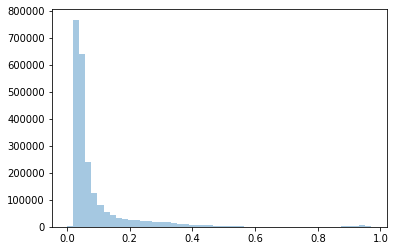

In [ ]:
sns.distplot(x=tracks['speechiness'], kde=False)

Batidas por Minuto

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


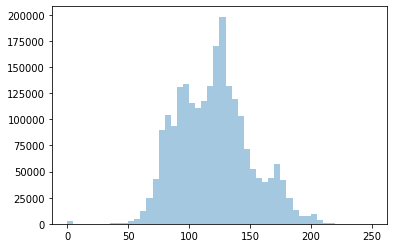

In [ ]:
sns.distplot(x=tracks['tempo'], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


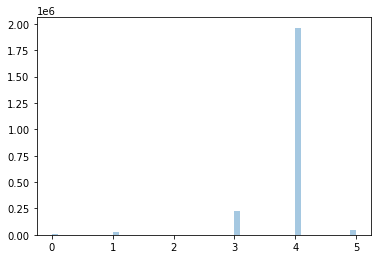

In [ ]:
sns.distplot(x=tracks['time_signature'], kde=False)

In [ ]:
tracks.describe()

,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
count,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06,2.261616e+06
mean,2.473074e+05,8.821330e+00,3.547122e-01,5.504348e-01,5.849078e-01,2.208303e-01,5.261542e+00,2.091089e-01,-9.659827e+00,6.549538e-01,8.923554e-02,1.199907e+02,3.879942e+00
std,1.580871e+05,1.270568e+01,3.543688e-01,1.845284e-01,2.660109e-01,3.494136e-01,3.558962e+00,1.898145e-01,5.624235e+00,4.753834e-01,1.152106e-01,2.991865e+01,4.719100e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.842030e+05,0.000000e+00,2.220000e-02,4.270000e-01,3.890000e-01,0.000000e+00,2.000000e+00,9.570000e-02,-1.190900e+01,0.000000e+00,3.540000e-02,9.694100e+01,4.000000e+00
50%,2.252300e+05,2.000000e+00,2.150000e-01,5.650000e-01,6.220000e-01,6.020000e-04,5.000000e+00,1.280000e-01,-8.175000e+00,1.000000e+00,4.700000e-02,1.200070e+02,4.000000e+00
75%,2.782412e+05,1.400000e+01,6.910000e-01,6.890000e-01,8.090000e-01,4.210000e-01,8.000000e+00,2.640000e-01,-5.826000e+00,1.000000e+00,8.380000e-02,1.380530e+02,4.000000e+00
max,2.015906e+07,8.900000e+01,9.960000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,4.923000e+00,1.000000e+00,9.710000e-01,2.499870e+02,5.000000e+00


In [ ]:
tracks.corr()

,duration_ms,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature
duration_ms,1.000000,-0.018045,-0.038681,-0.068054,-0.007007,0.125012,0.001082,0.023210,-0.063345,-0.035633,-0.033453,-0.009919,0.020938
popularity,-0.018045,1.000000,-0.062444,0.040809,0.063099,-0.114028,0.002384,0.002155,0.089248,-0.000851,-0.024749,0.014741,0.025021
acousticness,-0.038681,-0.062444,1.000000,-0.285666,-0.739522,0.187134,-0.037149,-0.065708,-0.613482,0.081664,-0.057158,-0.202579,-0.181075
danceability,-0.068054,0.040809,-0.285666,1.000000,0.252733,-0.202916,0.033463,-0.100598,0.322454,-0.064239,0.170121,-0.001752,0.197058
energy,-0.007007,0.063099,-0.739522,0.252733,1.000000,-0.227632,0.044201,0.189439,0.788601,-0.074012,0.133717,0.235639,0.186932
instrumentalness,0.125012,-0.114028,0.187134,-0.202916,-0.227632,1.000000,-0.012490,-0.106206,-0.401877,-0.051654,-0.153154,-0.048466,-0.052824
key,0.001082,0.002384,-0.037149,0.033463,0.044201,-0.012490,1.000000,-0.000110,0.032168,-0.159793,0.023430,0.008390,0.010408
liveness,0.023210,0.002155,-0.065708,-0.100598,0.189439,-0.106206,-0.000110,1.000000,0.097707,0.010205,0.190169,0.013130,0.004274
loudness,-0.063345,0.089248,-0.613482,0.322454,0.788601,-0.401877,0.032168,0.097707,1.000000,-0.029955,0.052756,0.208503,0.170999
mode,-0.035633,-0.000851,0.081664,-0.064239,-0.074012,-0.051654,-0.159793,0.010205,-0.029955,1.000000,-0.051520,0.003925,-0.027639


In [ ]:
pairwise_distances(tracks.drop(['id','name','artists','explicit'], axis=1),metric='cosine')

In [ ]:
# hash feature sklearn